In [ ]:
import pandas as pd
import numpy as np
import numpy
from numpy import array
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd



In [ ]:

dataset = pd.read_excel("final.xlsx")
z = dataset.drop(["Wind Speed","Wind Direction",'Time','Pressure'], axis=1)
z.head()



,Temperature,RH,Rainfall
0,262,60,5367
1,262,60,5367
2,262,60,5367
3,262,60,5367
4,261,60,5367


In [ ]:


#Changing pandas dataframe to numpy array
X = z.iloc[:,0:1].values
y = z.iloc[:,1:2].values



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 1)

In [ ]:
X_train.shape

(37248, 1)

In [ ]:


model = Sequential()
model.add(Dense(200, input_dim=1, activation='relu'))
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(1, activation='linear'))



In [ ]:
keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mean_absolute_percentage_error'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 81,001
Trainable params: 81,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)



Epoch 1/50
990/990 [==============================] - 17s 3ms/step - loss: 1585.2850 - mean_absolute_percentage_error: 162525484.5550 - val_loss: 410.1914 - val_mean_absolute_percentage_error: 192048448.0000
Epoch 2/50
990/990 [==============================] - 3s 3ms/step - loss: 424.0725 - mean_absolute_percentage_error: 182022458.0563 - val_loss: 426.3062 - val_mean_absolute_percentage_error: 165053984.0000
Epoch 3/50
990/990 [==============================] - 2s 2ms/step - loss: 359.0106 - mean_absolute_percentage_error: 199378619.6367 - val_loss: 355.9790 - val_mean_absolute_percentage_error: 176088224.0000
Epoch 4/50
990/990 [==============================] - 3s 3ms/step - loss: 324.3591 - mean_absolute_percentage_error: 195573250.2449 - val_loss: 575.1072 - val_mean_absolute_percentage_error: 176771680.0000
Epoch 5/50
990/990 [==============================] - 2s 2ms/step - loss: 296.7218 - mean_absolute_percentage_error: 233519454.2048 - val_loss: 223.5241 - val_mean_absolute_p

In [ ]:
#Evaluation of Model
#https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
scores=model.evaluate(X_test, y_test, verbose=1)
print("\n")
print("Loss, MSE (Mean Squared Error), MAE(Mean Absolute Error)")
print(scores)
print("\n")

# list all data in history
print(history.history.keys())

#Plot Graphs
# plot metricsplt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

206/206 [==============================] - 0s 1ms/step - loss: 222.7073 - mean_absolute_percentage_error: 254756272.0000


Loss, MSE (Mean Squared Error), MAE(Mean Absolute Error)
[222.707275390625, 254756272.0]


dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])


In [ ]:
#Next is to use the deep regression model to predict the Rainfall an Temperature in UI lab 
Xnew1 = z['Temperature']
Xnew2 = z['RH']
ynew1 = model.predict(Xnew1)
print("The predicted Rainfall for input X1 is", ynew1)
print("\n")

ynew2 = model.predict(Xnew2)
print("The predicted Rainfall  for input X2 is", ynew2)
print("\n")


The predicted Rainfall for input X1 is [[55.748913]
 [55.748913]
 [55.748913]
 ...
 [66.14262 ]
 [66.142624]
 [66.142624]]


The predicted Rainfall  for input X2 is [[93.86727 ]
 [93.86727 ]
 [93.86727 ]
 ...
 [86.895836]
 [86.89582 ]
 [86.89582 ]]




In [ ]:
LSTM Architecture

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
21472/21472 [==============================] - 69s 2ms/step - loss: 0.0144 - val_loss: 6.7090e-04

Epoch 00001: saving model to best_model.h5
Epoch 2/10
21472/21472 [==============================] - 51s 2ms/step - loss: 0.0062 - val_loss: 6.9482e-04

Epoch 00002: saving model to best_model.h5
Epoch 3/10
21472/21472 [==============================] - 52s 2ms/step - loss: 0.0062 - val_loss: 7.0178e-04

Epoch 00003: saving model to best_model.h5
Epoch 4/10
21472/21472 [==============================] - 50s 2ms/step - loss: 0.0062 - val_loss: 7.0886e-04

Epoch 00004: saving model to best_model.h5
Epoch 5/10
21472/21472 [==============================] - 53s 2ms/step - loss: 0.0062 - val_loss: 7.1395e-04

Epoch 00005: saving model to best_model.h5
Epoch 6/10
21472/21472 [==============================] - 53s 2ms/step - loss: 0.0062 - val_loss: 7.1755e-04

Epoch 00006: saving model to best_model.h5
Epoch 7/10
21472/21472 [==============================] - 53s 2ms/step - loss: 0.0

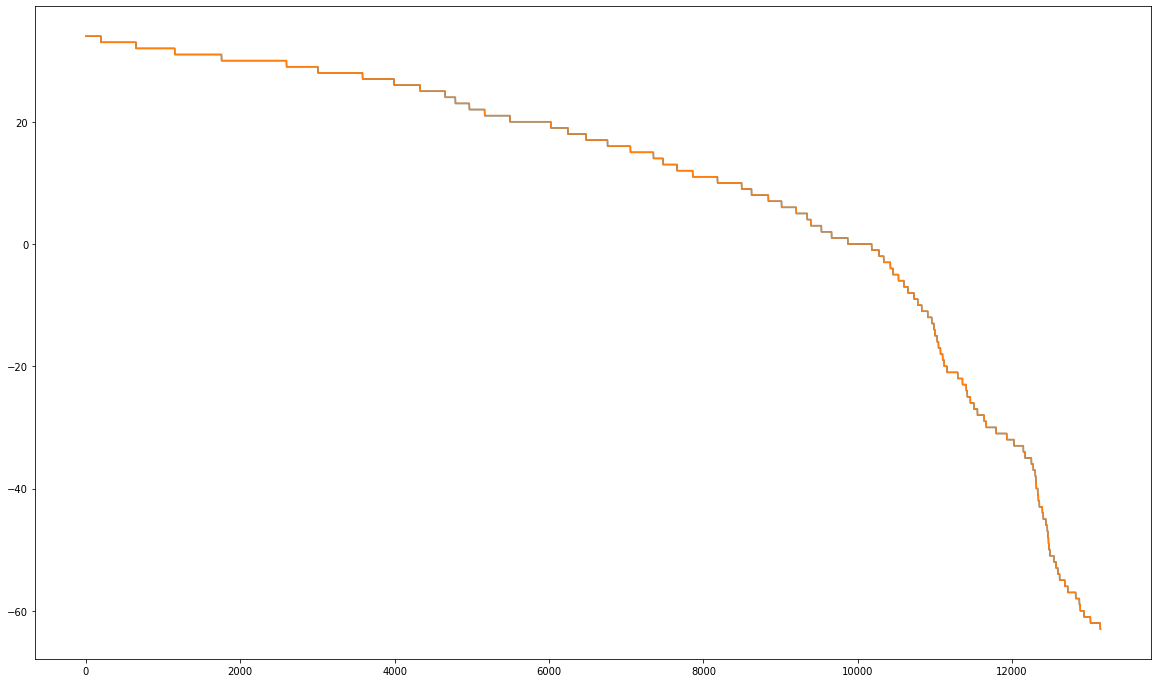

Test R2: 1.000


In [ ]:



import pandas as pd


from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from math import sqrt
from matplotlib import pyplot
import numpy

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model



# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  
  model = Sequential()
  model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  # simple early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose= 1)
  mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1)
  
  model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1, shuffle=False, callbacks=[es, mc], validation_split=0.3)
  saved_model = load_model('best_model.h5')
  
  return saved_model
  
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
cwd = pd.read_excel('final.xlsx')

series = cwd['Temperature']

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# Split data into training (80%) and test (20%)
nrow = round(0.7*series.shape[0])
train, test = supervised_values[0:nrow], supervised_values[(nrow+1):]


# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 10, 20)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# evaluate the model
X, y = train_scaled[:, 0:-1], train_scaled[:, -1]
trainX = X.reshape(X.shape[0], 1, X.shape[1])
trainy = y 

train_pred = lstm_model.predict(trainX, batch_size=1)
train_mse = mean_squared_error(trainy, train_pred)

X, y = test_scaled[:, 0:-1], test_scaled[:, -1]
testX = X.reshape(X.shape[0], 1, X.shape[1])
testy = y

test_pred = lstm_model.predict(testX, batch_size=1)
test_mse = mean_squared_error(testy, test_pred)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
#  print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[(nrow+2):], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.figure(figsize=(20,12))
pyplot.plot(raw_values[(nrow+1):])
pyplot.plot(predictions)
pyplot.show()

from sklearn.metrics import r2_score
rscore = sqrt(r2_score(raw_values[(nrow+2):], predictions))
print('Test R2: %.3f' % rscore)

Epoch 1/11
21472/21472 [==============================] - 611s 28ms/step - loss: 0.0114 - val_loss: 7.0697e-04

Epoch 00001: saving model to best_model.h5
Epoch 2/11
21472/21472 [==============================] - 561s 26ms/step - loss: 0.0067 - val_loss: 6.9774e-04

Epoch 00002: saving model to best_model.h5
Epoch 3/11
21472/21472 [==============================] - 558s 26ms/step - loss: 0.0064 - val_loss: 6.6169e-04

Epoch 00003: saving model to best_model.h5
Epoch 4/11
21472/21472 [==============================] - 539s 25ms/step - loss: 0.0063 - val_loss: 6.9637e-04

Epoch 00004: saving model to best_model.h5
Epoch 5/11
21472/21472 [==============================] - 541s 25ms/step - loss: 0.0062 - val_loss: 7.1144e-04

Epoch 00005: saving model to best_model.h5
Epoch 6/11
21472/21472 [==============================] - 531s 25ms/step - loss: 0.0062 - val_loss: 7.2019e-04

Epoch 00006: saving model to best_model.h5
Epoch 7/11
21472/21472 [==============================] - 515s 24ms/st

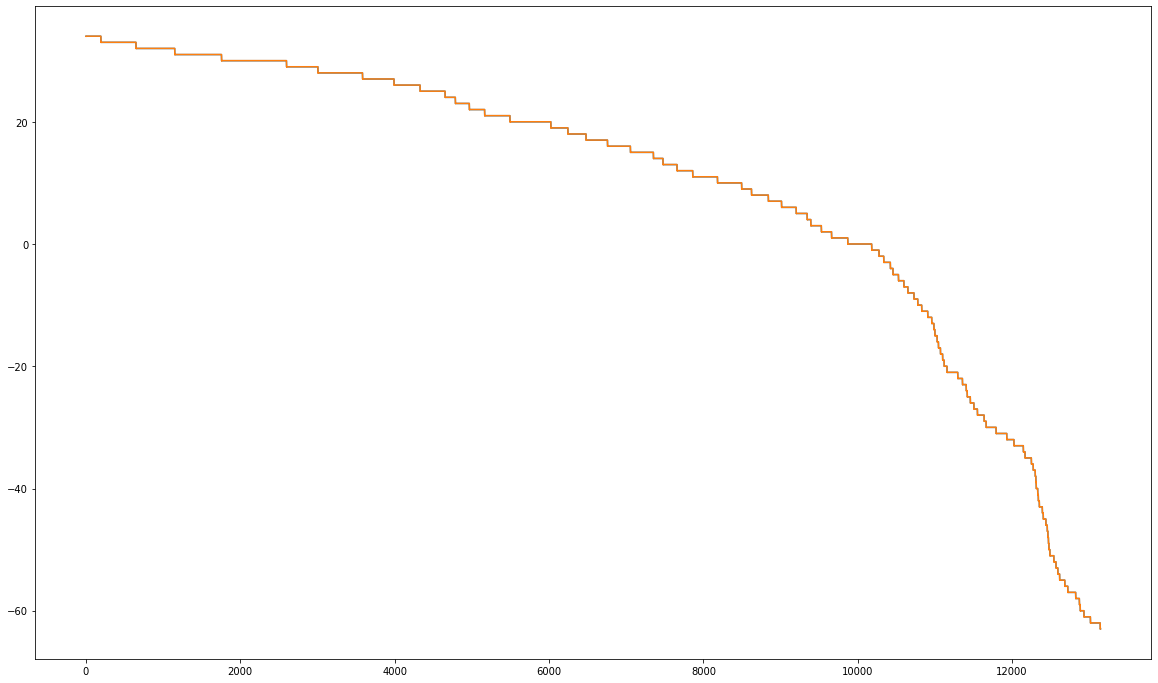

Test R2: 1.000


In [ ]:

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 11, 1000)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# evaluate the model
X, y = train_scaled[:, 0:-1], train_scaled[:, -1]
trainX = X.reshape(X.shape[0], 1, X.shape[1])
trainy = y 

train_pred = lstm_model.predict(trainX, batch_size=1)
train_mse = mean_squared_error(trainy, train_pred)

X, y = test_scaled[:, 0:-1], test_scaled[:, -1]
testX = X.reshape(X.shape[0], 1, X.shape[1])
testy = y

test_pred = lstm_model.predict(testX, batch_size=1)
test_mse = mean_squared_error(testy, test_pred)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
#  print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[(nrow+2):], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.figure(figsize=(20,12))
pyplot.plot(raw_values[(nrow+1):])
pyplot.plot(predictions)
pyplot.show()

from sklearn.metrics import r2_score
rscore = sqrt(r2_score(raw_values[(nrow+2):], predictions))
print('Test R2: %.3f' % rscore)

In [ ]:


import pandas as pd


from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from math import sqrt
from matplotlib import pyplot
import numpy

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model



# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  
  model = Sequential()
  model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  # simple early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose= 1)
  mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1)
  
  model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1, shuffle=False, callbacks=[es, mc], validation_split=0.3)
  saved_model = load_model('best_model.h5')
  
  return saved_model
  
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
cwd = pd.read_excel('final.xlsx')

series = cwd['Temperature']

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# Split data into training (80%) and test (20%)
nrow = round(0.7*series.shape[0])
train, test = supervised_values[0:nrow], supervised_values[(nrow+1):]


# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 15, 70303)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# evaluate the model
X, y = train_scaled[:, 0:-1], train_scaled[:, -1]
trainX = X.reshape(X.shape[0], 1, X.shape[1])
trainy = y 

train_pred = lstm_model.predict(trainX, batch_size=1)
train_mse = mean_squared_error(trainy, train_pred)

X, y = test_scaled[:, 0:-1], test_scaled[:, -1]
testX = X.reshape(X.shape[0], 1, X.shape[1])
testy = y

test_pred = lstm_model.predict(testX, batch_size=1)
test_mse = mean_squared_error(testy, test_pred)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
#  print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[(nrow+2):], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.figure(figsize=(20,12))
pyplot.plot(raw_values[(nrow+1):])
pyplot.plot(predictions)
pyplot.show()

from sklearn.metrics import r2_score
rscore = sqrt(r2_score(raw_values[(nrow+2):], predictions))
print('Test R2: %.3f' % rscore)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:


import pandas as pd


from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from math import sqrt
from matplotlib import pyplot
import numpy

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model



# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  
  model = Sequential()
  model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  # simple early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose= 1)
  mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1)
  
  model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1, shuffle=False, callbacks=[es, mc], validation_split=0.3)
  saved_model = load_model('best_model.h5')
  
  return saved_model
  
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# load dataset
cwd = pd.read_excel('final.xlsx')

series = cwd['Temperature']

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# Split data into training (80%) and test (20%)
nrow = round(0.7*series.shape[0])
train, test = supervised_values[0:nrow], supervised_values[(nrow+1):]


# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 25, 219119)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# evaluate the model
X, y = train_scaled[:, 0:-1], train_scaled[:, -1]
trainX = X.reshape(X.shape[0], 1, X.shape[1])
trainy = y 

train_pred = lstm_model.predict(trainX, batch_size=1)
train_mse = mean_squared_error(trainy, train_pred)

X, y = test_scaled[:, 0:-1], test_scaled[:, -1]
testX = X.reshape(X.shape[0], 1, X.shape[1])
testy = y

test_pred = lstm_model.predict(testX, batch_size=1)
test_mse = mean_squared_error(testy, test_pred)

print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
#  print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[(nrow+2):], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.figure(figsize=(20,12))
pyplot.plot(raw_values[(nrow+1):])
pyplot.plot(predictions)
pyplot.show()

from sklearn.metrics import r2_score
rscore = sqrt(r2_score(raw_values[(nrow+2):], predictions))
print('Test R2: %.3f' % rscore)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ls

best_model.h5  final.xlsx  gdrive/  sample_data/


In [ ]:
%cd gdrive/

/content/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
%cd MyDrive/

/content/gdrive/MyDrive


In [ ]:
ls

 archive/
'archive (1)'/
 chicago-smart-green-infrastructure-monitoring-data.zip
'Colab Notebooks'/
'DATA ANALYSIS DD..with correction.docx'
 dc-motor-130.snapshot.3/
 final.xlsx
 heatmap_Sensors.png
'Hununuw..flash ubuntu'/
 ICTE.gdoc
'Intelligent systems and robotic.docx'
 ISR.docx
 ISR.gdoc
'ISR New.docx'
 ISR.odt
 kaggle.json
'Node-red VS MD(2).xlsx'
 Shareddrives/
 smart-green-infrastructure-monitoring-sensors-historical.csv
 smartH.csv
 smartN.csv
 socrata_metadata.json
 SUI.csv
'Untitled folder'/
